# Spotify Genre Analysis and Classification
## MA 384 Statistical Methods for Use in Research
## Michael Salgado

## Introduction
In today's digital world, obtaining and studying user analytics is an ever growing need in order to create a product that is personalized to every user. From navigation behavior on Amazon's homepage to video engagement on Youtube, companies are always researching how to use their analysis collection to improve their recommendation systems to help users find content that would keep them on their platform. 

## Background
For this project, I will be focusing on a dataset called "Prediction of music genre" which contains 17 feature columns and 50,000 rows of data, which will be used to predict what type of genre a song is categorized as. Specifically, the feature columns are as listed:
- instance_id
- artist_name
- track_name
- popularity
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness
- key
- liveness
- loudness
- mode
- speechiness
- tempo
- obtained_date
- valence

These variables were obtained for each song using Spotify's Web API. Although the algorithms used to calculate each of these features for a song are not publically available, descriptions on what each of these features mean are included in the documentation. For example, the "energy" feature is a floating point number from 0.0 to 1.0 and represents "a perceptual measure of intensity and activity...perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." With these continuous and categorical variables, exploratory data analysis can be done to understand variable correlations and models could be created to predict genres using these features. Although I do not have a deep understanding on some of the feature columns, I would hypothesize that variables such as energy, loudness, tempo, and valence will have some correlation with genre, while variables like popularity, speechiness, duration, and popularity will not be important in predicting a song's genre. 


https://www.kaggle.com/vicsuperman/prediction-of-music-genre

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn import metrics, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Preprocessing

To begin working with this dataset, I will perform data cleaning and transformation to prepare it for use in statistical analysis and modeling. This includes ensuring data types, filling or removing missing values, applying normalization, and using one-hot encoding for nominal variables such as key and mode.

### Loading in the dataset

In [2]:
songs_df = pd.read_csv("music_genre.csv")

In [3]:
songs_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Because we are interested in classifying music genres using features calculated for each song, the variables instance_id and obtained_date will not be useful in this context. Additionally, the variables artist_name and track_name could potentially be used in finding a genre, but this would require additional pre-processing and potential semantic analysis that is not within the scope of this project. For this reason, these variables will be dropped in order to investigate the other feature columns that could provide more insight into potential correlations and new conclusions.

In [4]:
songs_df = songs_df.drop(["instance_id", "artist_name", "track_name", "obtained_date"], axis=1)

In [5]:
songs_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


### Data types

I will investigate each column's data types to ensure that they are the expected and appropriate format to be used in this exploratory data analysis

In [6]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  object 
 12  valence           50000 non-null  float64
 13  music_genre       50000 non-null  object 
dtypes: float64(10), object(4)
memory usage: 5.3+ MB


In [7]:
songs_df["tempo"] = pd.to_numeric(songs_df["tempo"], errors='coerce')
for col in ["key", "mode", "music_genre"]:
    songs_df[col] = songs_df[col].astype("category")
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        50000 non-null  float64 
 1   acousticness      50000 non-null  float64 
 2   danceability      50000 non-null  float64 
 3   duration_ms       50000 non-null  float64 
 4   energy            50000 non-null  float64 
 5   instrumentalness  50000 non-null  float64 
 6   key               50000 non-null  category
 7   liveness          50000 non-null  float64 
 8   loudness          50000 non-null  float64 
 9   mode              50000 non-null  category
 10  speechiness       50000 non-null  float64 
 11  tempo             45020 non-null  float64 
 12  valence           50000 non-null  float64 
 13  music_genre       50000 non-null  category
dtypes: category(3), float64(11)
memory usage: 4.3 MB


### Handling missing values

In [8]:
print(f"{songs_df.shape[0]} rows, {songs_df.shape[1]} columns\n")

for col in songs_df.columns:
    print(f"Missing {songs_df[col].isnull().values.sum()} values for {col}")
    
print(f"\n{len(songs_df[songs_df.isnull().any(axis=1)])} rows with missing values")

50005 rows, 14 columns

Missing 5 values for popularity
Missing 5 values for acousticness
Missing 5 values for danceability
Missing 5 values for duration_ms
Missing 5 values for energy
Missing 5 values for instrumentalness
Missing 5 values for key
Missing 5 values for liveness
Missing 5 values for loudness
Missing 5 values for mode
Missing 5 values for speechiness
Missing 4985 values for tempo
Missing 5 values for valence
Missing 5 values for music_genre

4985 rows with missing values


In [9]:
songs_df[songs_df['tempo'].isnull()]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,NaN,0.6140,Electronic
32,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,NaN,0.1380,Electronic
35,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,NaN,0.2390,Electronic
36,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,NaN,0.7270,Electronic
39,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,NaN,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,NaN,0.1440,Hip-Hop
49964,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,NaN,0.8860,Hip-Hop
49967,62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,NaN,0.2210,Hip-Hop
49976,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,NaN,0.5890,Hip-Hop


In [10]:
songs_df = songs_df.dropna()
print(f"{songs_df.shape[0]} rows, {songs_df.shape[1]} columns")

45020 rows, 14 columns


### Encoding categorical variables
Both the key and mode feature variables could be described as nominal data as these are not assigned a specific numerical value or order, but just as a description of a song. For this reason, I will be using one-hot encoding in order to map each category with a binary number of 0 or 1.

In [11]:
print(f"key values: {songs_df['key'].cat.categories.tolist()}")
print(f"mode values: {songs_df['mode'].cat.categories.tolist()}")

key values: ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
mode values: ['Major', 'Minor']


In [12]:
encoded_df = songs_df.copy()
encoded_df = pd.get_dummies(encoded_df, prefix='key', columns=['key'])
encoded_df = pd.get_dummies(encoded_df, prefix='mode', columns=['mode'])
print(encoded_df.shape)
print(encoded_df.columns.tolist())

(45020, 26)
['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'music_genre', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']


After applying one-hot encoding to the dataframe to split the key and mode into separate columns, we now have 26 columns including the genre output.

### Data normalization
Although most of the feature columns is generated with a floating point number between 0.0 and 1.0, the columns of popularity, duration_ms, and tempo are not limited to these bounds. Since I will be using kNN as one of my classification algorithms, it will be important that some normalization is used in order to give equal weights to all variables as distance is used to determine clusters.

In [13]:
encoded_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,...,0,0,0,0,0,0,0,0,0,1
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,...,0,1,0,0,0,0,0,0,0,1
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,...,0,0,0,0,0,0,0,1,1,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,...,1,0,0,0,0,0,0,0,1,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,...,0,0,0,0,0,1,0,0,1,0


In [14]:
scaled_df = encoded_df.copy()
for column in scaled_df.columns:
    if not pd.api.types.is_categorical_dtype(scaled_df[column]):
        scaled_df[column] = scaled_df[column]  / scaled_df[column].abs().max()
scaled_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.272727,0.004699,0.661258,-2.223213e-07,0.941942,0.795181,0.115,-0.110551,0.079406,0.458012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.313131,0.012751,0.630832,4.853119e-02,0.890891,0.953815,0.124,-0.149705,0.031847,0.522081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.282828,0.003072,0.628803,4.793537e-02,0.755756,0.011847,0.534,-0.098138,0.036624,0.581062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.343434,0.025502,0.784990,3.709987e-02,0.700701,0.002540,0.157,-0.095609,0.253715,0.581153,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.323232,0.004669,0.647059,4.943737e-02,0.587588,0.912651,0.157,-0.133189,0.043843,0.658429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Separating feature columns from output
In order to use training and testing splits for the classification prediction tests and create numerical graphs for visual correlations, I separated the labels for the columns as all of the features, numerical features, key features, mode features, and all of the genres.

In [15]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   popularity        45020 non-null  float64 
 1   acousticness      45020 non-null  float64 
 2   danceability      45020 non-null  float64 
 3   duration_ms       45020 non-null  float64 
 4   energy            45020 non-null  float64 
 5   instrumentalness  45020 non-null  float64 
 6   liveness          45020 non-null  float64 
 7   loudness          45020 non-null  float64 
 8   speechiness       45020 non-null  float64 
 9   tempo             45020 non-null  float64 
 10  valence           45020 non-null  float64 
 11  music_genre       45020 non-null  category
 12  key_A             45020 non-null  float64 
 13  key_A#            45020 non-null  float64 
 14  key_B             45020 non-null  float64 
 15  key_C             45020 non-null  float64 
 16  key_C#            4502

In [16]:
song_features = songs_df.drop("music_genre", axis=1)
numerical_columns = scaled_df.columns[0:11].tolist()
key_columns = scaled_df.columns[12:24].tolist()
mode_columns = scaled_df.columns[24:26].tolist()
genre_names = list(songs_df["music_genre"].cat.categories)
feature_names = list(scaled_df.copy().drop("music_genre", axis=1).columns)

In [17]:
y = scaled_df['music_genre']
x = scaled_df.copy().drop(['music_genre'], axis=1)

## Data analysis and visualization
As I am doing classification and not regression, the correlation techniques that we have learned during class such as forward-selection and backward-elminiation do not apply to the data. Instead, I will be creating bar graphs, distribution graphs, box plots, and heatmaps to find correlations in the count of songs in each genre.

### Genre Counts
Since the count of classes can affect model training, I created a graph of value counts for each genre in the dataset. If there is an uneven class distribution in the dataset, a model may become overfit towards one class and reduce its accuracy. According to the genre count graph, there is a very even genre count so the model training will have no bias towards one class.

Text(0, 0.5, 'Count')

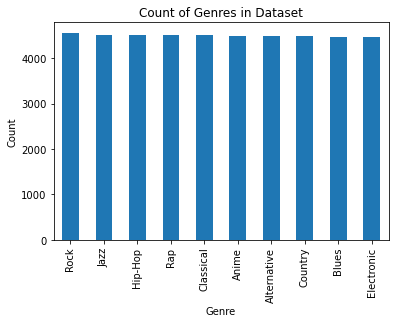

In [18]:
genre_counts = scaled_df['music_genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Count of Genres in Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')

### Numerical variable counts
Here, I have created bar graphs for the counts of each numerical variable to show the distributions of the values. As we are looking into correlation, having a variable that is relatively bell-shaped could indicate that there is a noticable difference in songs from one end of the spectrum to the other. This is the case with danceability as it shows a standard distribution, with a low danceability song probably having either uneven beats and low valence, while a high danceability song would have even beats and high valence. For a graph that is heavily skewed such as speechiness and liveness, this may not be helpful in finding correlations in songs as most of the songs would fall under a similar score.

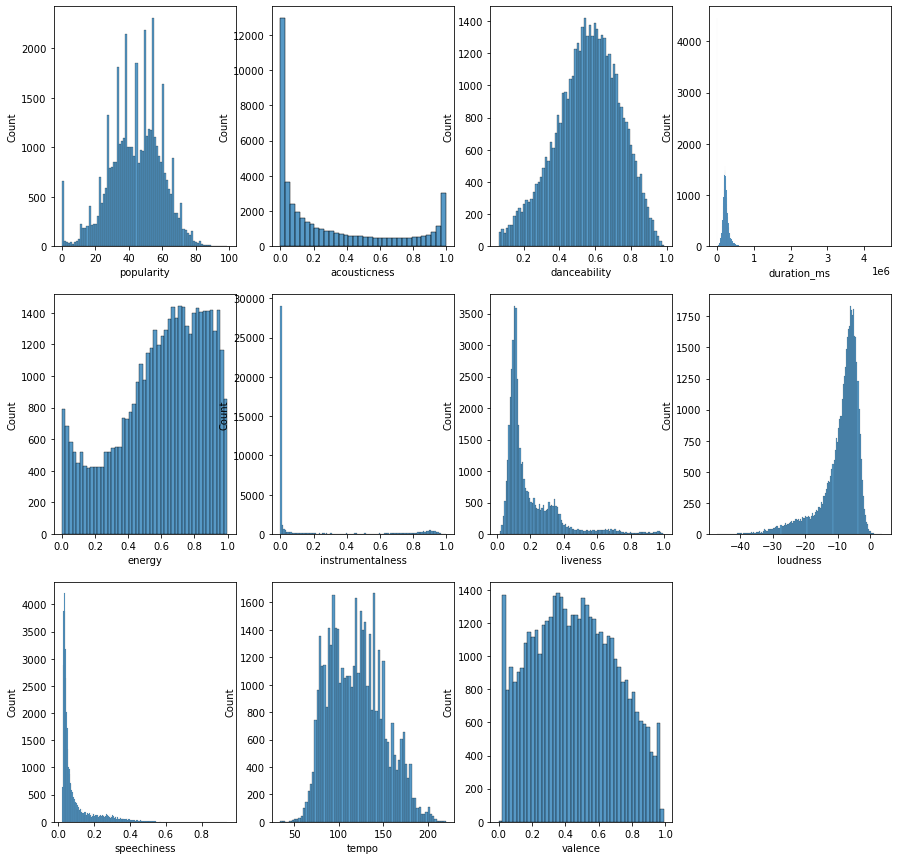

In [19]:
fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (15, 15))
fig.delaxes(axs[2][3])

index = 0
axs = axs.flatten()
for k, v in song_features.items():
    if k in numerical_columns:
        sns.histplot(v, ax = axs[index], kde=False)
        index += 1

<AxesSubplot:xlabel='danceability', ylabel='Count'>

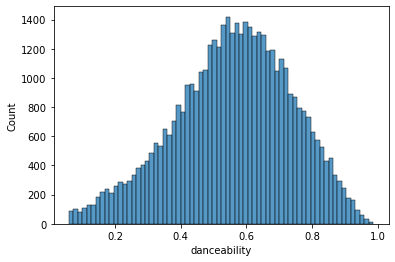

In [20]:
sns.histplot(song_features['danceability'])

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

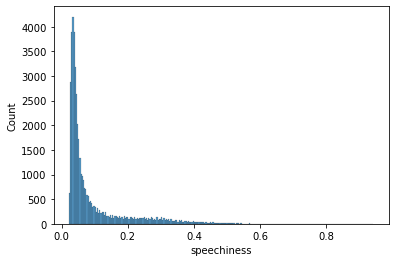

In [21]:
sns.histplot(song_features['speechiness'])

### Key counts
Here is a bar graph of the count of keys against genre, which shows that the key of G has the most songs while the key of D# has the least songs. Despite having a difference of count in the thousands, there is still a large amount of songs in D#, which should be enough to have a good represenation in our models.

Text(0, 0.5, 'Count')

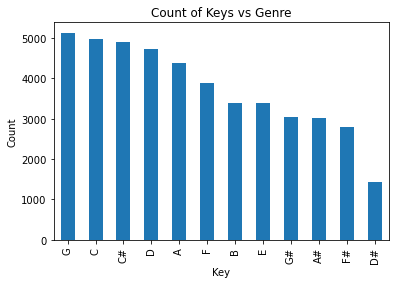

In [22]:
songs_df['key'].value_counts().plot(kind='bar')
plt.title('Count of Keys vs Genre')
plt.xlabel('Key')
plt.ylabel('Count')

### Mode counts
Here is a bar graph of the count of modes against genre, which shows that there are a greater amount of songs in major compared to minor. Since these are the only two values for this categorical variable, the model could potentially skew towards predicting major over minor, but this is not enough information to conclude that this will actually be the case.

Text(0, 0.5, 'Count')

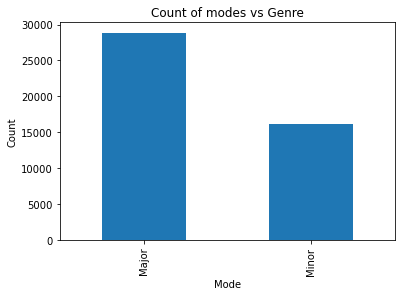

In [23]:
songs_df['mode'].value_counts().plot(kind='bar')
plt.title('Count of modes vs Genre')
plt.xlabel('Mode')
plt.ylabel('Count')

## Visual correlation to music genre
By looking at the value distribution of these variables, we may find some correlations with genre such as blues having a low danceability score or classical having low valence.

### Numerical variables
Here are all of the box plots for numerical variables against genre, with some of these having distributions that are clearly different between genres. For example, the genres of hip hop, rap, and rock typically have higher popularity scores than anime, blues, and classical. Additionally, the classical genre having very low energy, loudness, and valence compared to the other genres. This may point to models being able to correctly predict classical songs more often than other genres. Variables like tempo, liveness, duration_ms tend to be evenly balanced, which may point to these variables not affecting a model's performance much.

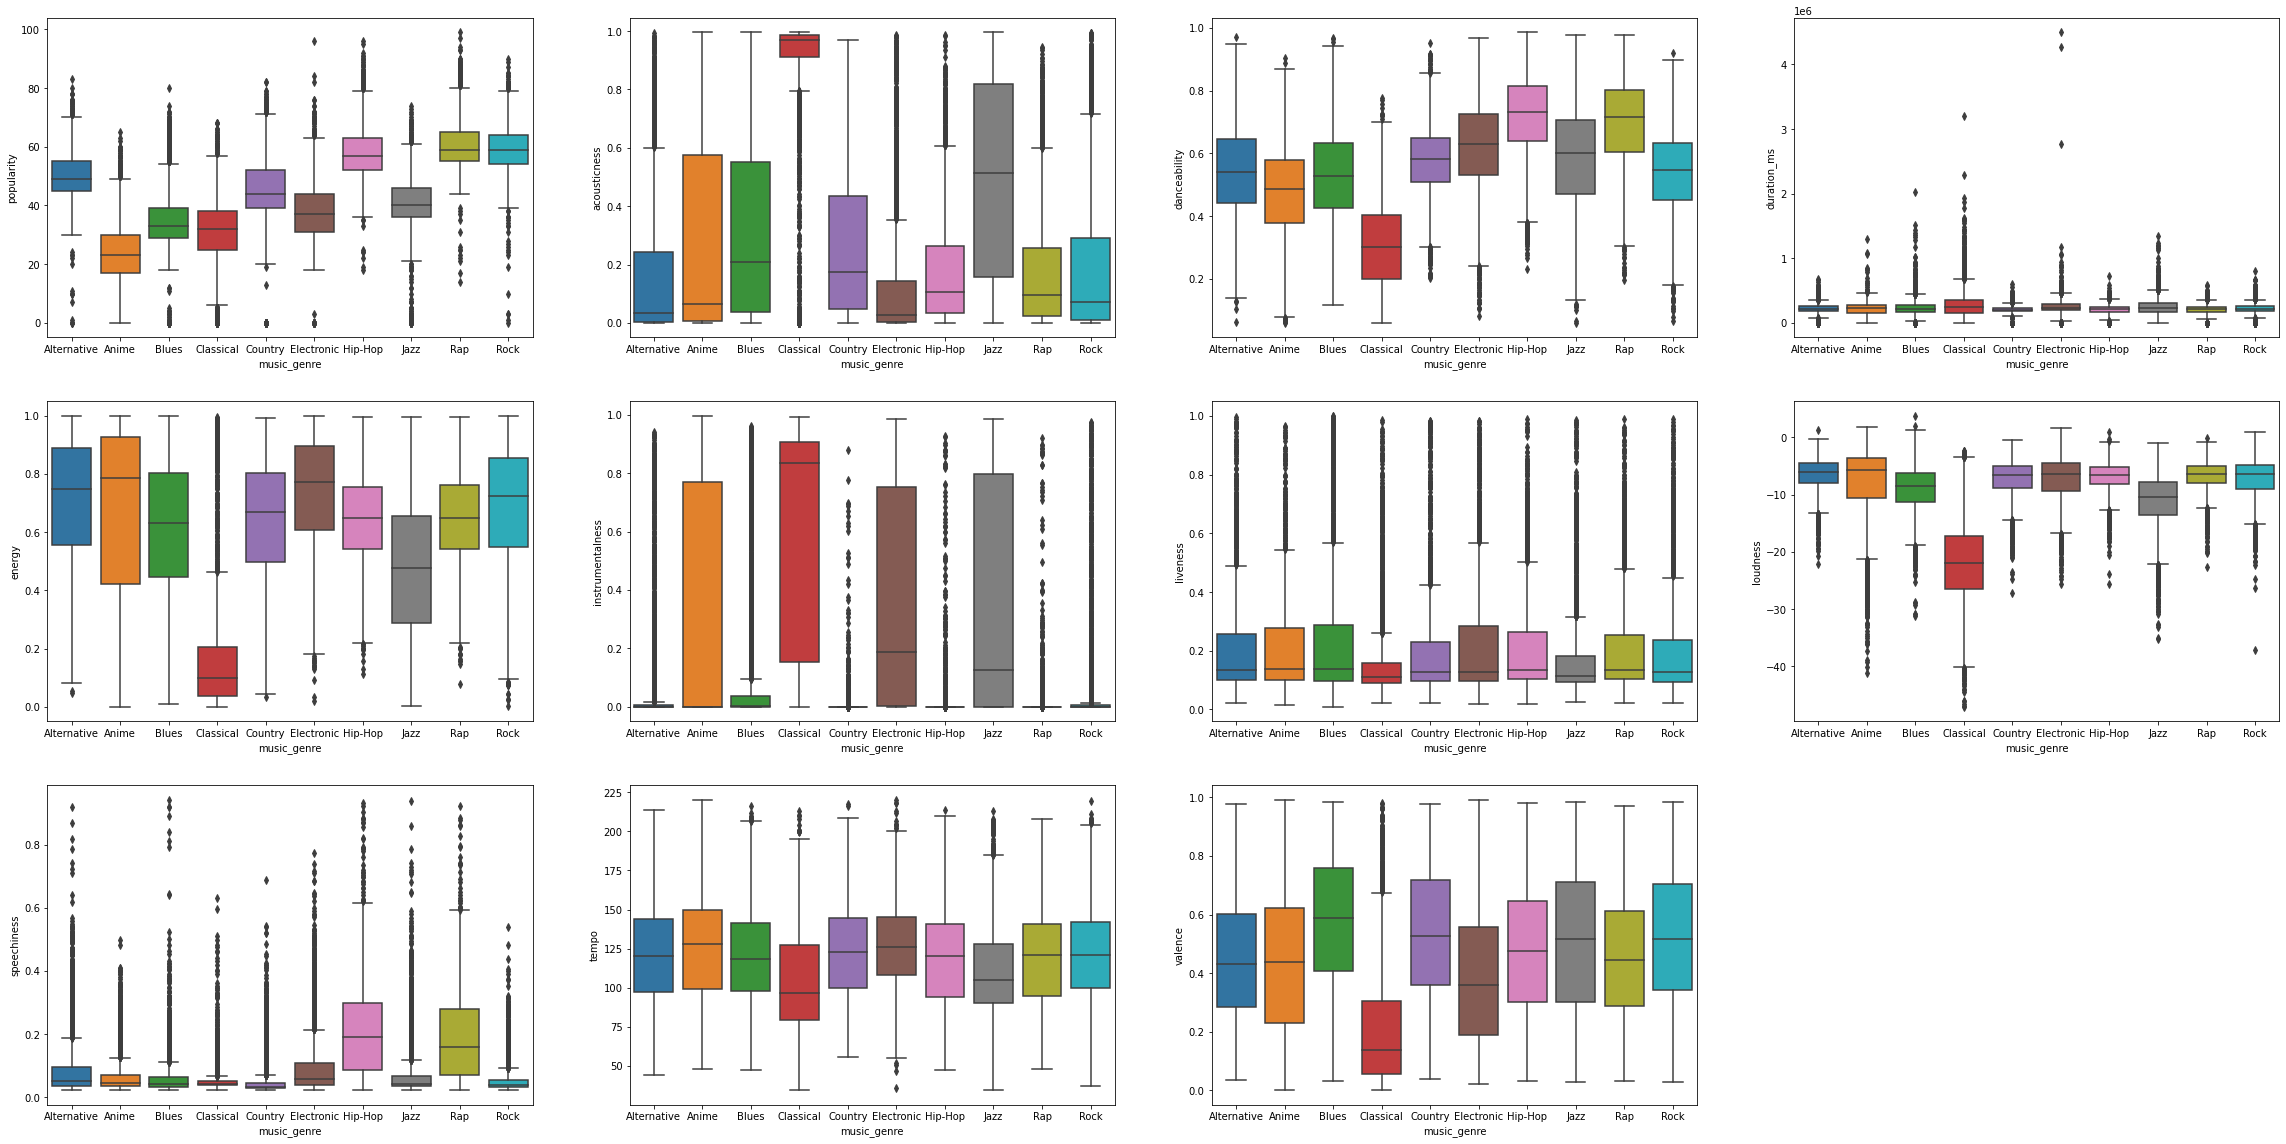

In [24]:
fig, ax = plt.subplots(3, 4, figsize=(40, 20))
fig.delaxes(ax[2][3])

for var, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x='music_genre', y=var, data=songs_df, ax=subplot)

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

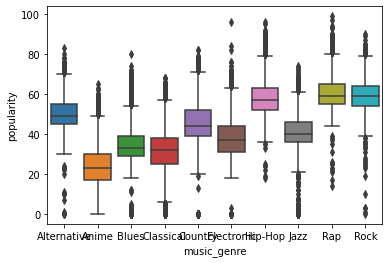

In [25]:
sns.boxplot(x='music_genre', y='popularity', data=songs_df)
plt

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

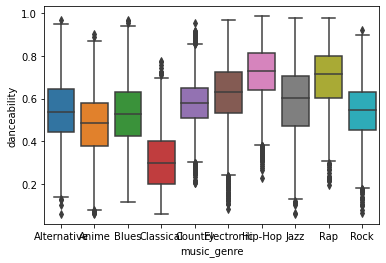

In [26]:
sns.boxplot(x='music_genre', y='danceability', data=songs_df)
plt

### Categorical variables
For the categorical variables, I have created a heatmap of the counts of songs for each value against genre to find if there is a correlation between one genre having a skew in one key or mode compared to the others. For example, if a majority of jazz songs are in the key of C, there may be some correlation here that is important in modeling, but the genre of classical is evenly balanced between keys, so this would not have an affect in prediction methods.

#### Key vs. Genre
This heatmap shows the counts of songs for each key value against genre. Despite there being a noticable increase of Hip-Hop songs in the key of C#, the distribution is relatively balanced across all of the genres, so I would guess that the key will not be very important in predicting genres.

In [27]:
key_counts = songs_df.groupby(['key','music_genre']).size().reset_index().rename(columns={0:'count'})

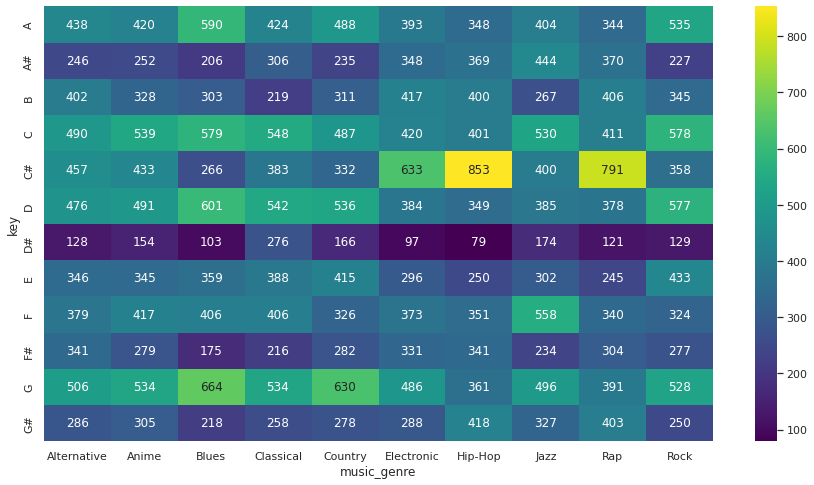

In [28]:
keys = key_counts.pivot("key", "music_genre", "count").fillna(0)
sns.set(rc = {'figure.figsize':(15,8)})
keys_hm = sns.heatmap(keys, annot=True, cmap="viridis", fmt='g')

#### Mode vs. Genre
This heatmap shows the count of songs for each mode against genre. According to the graph, a majority of blues, country, and rock songs are in major while rap, jazz, Hip-Hop, and electronic are relatively balanced. Although this may point to some correlation, as previously stated, there are much more songs in major in the dataset than songs in minor which is maybe reflected in this heatmap. 

In [29]:
mode_counts = songs_df.groupby(['mode','music_genre']).size().reset_index().rename(columns={0:'count'})

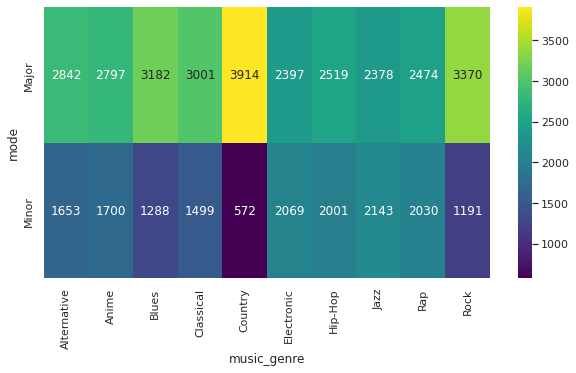

In [30]:
modes = mode_counts.pivot("mode", "music_genre", "count").fillna(0)
sns.set(rc = {'figure.figsize':(10,5)})
modes_hm = sns.heatmap(modes, annot=True, cmap="viridis", fmt='g')

## Classification Predictions
For my classification predictions, I will be using decision trees and kNN as these are simple models that are easy to implement. Additionally, an 80-20 training-testing split will be used for both approaches as well as using accuracy as the metric score. The four scores that these models produce are listed below:

**Accuracy**: Overall measure, correctly predicted observations over total observations.

**Precision**: Correctly predicted true observations over total predicted true observations. Good for scenarios where false positives are bad (email spam detection).

**Recall**: Correctly predicted true observations over total observations in a class. Good for scenarios where false negatives are bad (fraud detection).

**F1-score**: Weighted average of precision and recall. F1 is a good mesaure of there is an uneven class distribution (Functional vs defective devices manufactured) and needs a balance between precision and recall.

In the context of predicting music genres, there is no benefit in reducing false positives over false negatives, so using precision and recall serves no purpose here. The F1-score is a balance between precision and recall, but is especially useful when there is an uneven class distribution. Since I have previously found there to be an even distribution of genres, this is not necessary, so using accuracy as the metric score is an appropriate fit here.

### Decision Tree
A decision tree provides a simple way of structuring a model and has high interpretability as one can follow exactly how the model came up with a conclusion. For example, the tree may come to a conclusion that if a song had a popularity greater than 0.7, has a speechiness of 0.25, and a valence score of 0.89, the song would be predicted to be in the rock genre. 

#### Train-test split (80/20)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Training

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# #plt the figure, setting a black background
# plt.figure(figsize=(30,10), facecolor ='k')
# #create the tree plot
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    #use the class names stored
#                    class_names = genre_names,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# #show the plot
# plt.show()

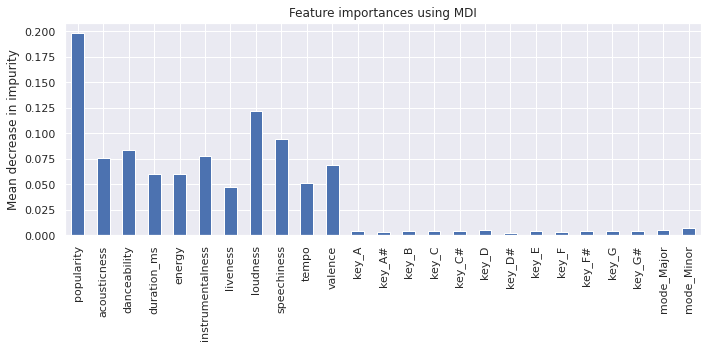

In [34]:
importances = clf.feature_importances_

importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Testing

In [35]:
y_pred = clf.predict(X_test)

Text(66.5, 0.5, 'Predictions')

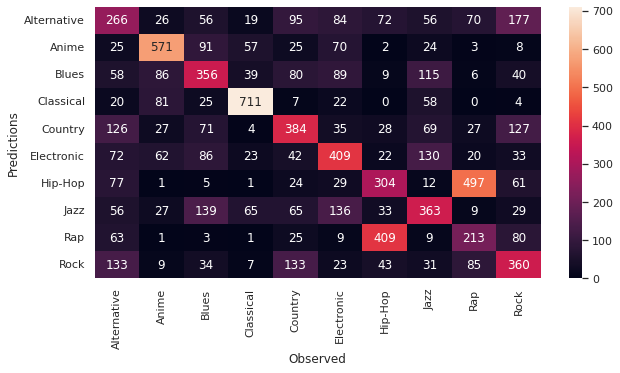

In [36]:
cm = pd.DataFrame(confusion_matrix(y_pred, y_test), 
                  columns=genre_names,
                  index=genre_names)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Observed")
plt.ylabel("Predictions")

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Alternative       0.29      0.30      0.29       896
       Anime       0.65      0.64      0.65       891
       Blues       0.41      0.41      0.41       866
   Classical       0.77      0.77      0.77       927
     Country       0.43      0.44      0.43       880
  Electronic       0.45      0.45      0.45       906
     Hip-Hop       0.30      0.33      0.31       922
        Jazz       0.39      0.42      0.41       867
         Rap       0.26      0.23      0.24       930
        Rock       0.42      0.39      0.41       919

    accuracy                           0.44      9004
   macro avg       0.44      0.44      0.44      9004
weighted avg       0.44      0.44      0.44      9004



After applying the training set to the decision tree classifier, I was able to obtain a heatmap of the observed versus predicted genres, classification report, and a bar graph of variable importance. According to the results, the decision tree was able to get a max f1-score of 0.75 for classical, a low f1-score of 0.25 for rap, and a general accuracy of 0.44. According to the feature importance, the popularity variable was found to be very effective in reducing prediction impurity as well as danceability, loudness, and speechiness.

### kNN Algorithm
The kNN algorithm works by taking in other data points with their known labels and comparing it with a new data point to determine it's classification using its distance from each other. For example, if a kNN model is using a k-value of 3, it will find the new data point's three nearest neighbors according to its distance using its variable values and take the majority of the neighbors' labels as the new classification. If the k-value is 6, it will look at the 6 nearest neighbors. This is a simple clustering approach that is effective for classification uses where having a human-readable model is not necessary as the number of feature columns greatly increases its complexity.

#### Train-test split (80/20)

In [38]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

#### Creating and fitting kNN classifier

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting on test set
Mean accuracy on the given test data and labels

In [40]:
y_pred = knn_classifier.predict(X_test)
acc = knn_classifier.score(X_test, y_test)
print(acc)

0.4336961350510884


In [41]:
print(y_test)
print(y_pred)

48115       Hip-Hop
26320           Rap
45661       Hip-Hop
5294          Anime
22733       Country
            ...    
24792       Country
5571          Anime
484      Electronic
24433       Country
26891           Rap
Name: music_genre, Length: 9004, dtype: category
Categories (10, object): ['Alternative', 'Anime', 'Blues', 'Classical', ..., 'Hip-Hop', 'Jazz', 'Rap', 'Rock']
['Hip-Hop' 'Rap' 'Rap' ... 'Hip-Hop' 'Country' 'Alternative']


Text(66.5, 0.5, 'Predictions')

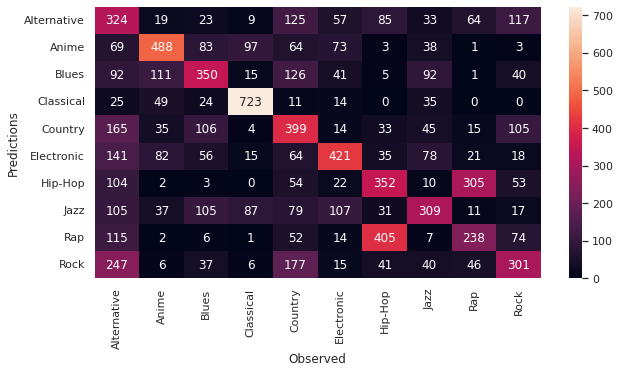

In [42]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=genre_names,
                  index=genre_names)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Observed")
plt.ylabel("Predictions")

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Alternative       0.23      0.38      0.29       856
       Anime       0.59      0.53      0.56       919
       Blues       0.44      0.40      0.42       873
   Classical       0.76      0.82      0.79       881
     Country       0.35      0.43      0.39       921
  Electronic       0.54      0.45      0.49       931
     Hip-Hop       0.36      0.39      0.37       905
        Jazz       0.45      0.35      0.39       888
         Rap       0.34      0.26      0.29       914
        Rock       0.41      0.33      0.37       916

    accuracy                           0.43      9004
   macro avg       0.45      0.43      0.44      9004
weighted avg       0.45      0.43      0.44      9004



After applying the training set to the kNN classifier, I was able to obtain a heatmap of the observed versus predicted genres and a classification report. According to the results, the decision tree was able to get a max f1-score of 0.79 for classical, a low f1-score of 0.29 for rap, and a general accuracy of 0.44.

#### With k-fold cross-validation

In this approach, I will be using 5-fold cross validation to ensure an accurate metric score as well as running a loop with a changing k-value for the kNN algorithm to find the most optimal number of neighbors.

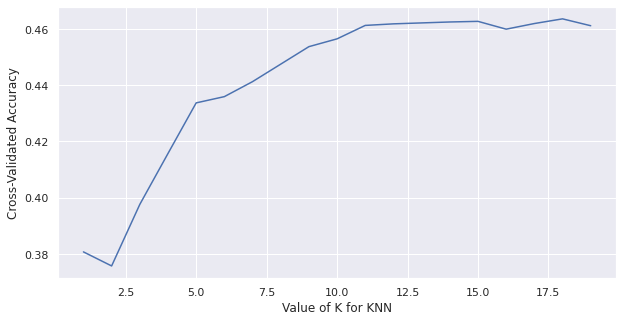

In [44]:
k_range = range(1, 20)
k_scores = []

for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(knn.score(X_test, y_test))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [45]:
max(k_scores)

0.46357174589071526

According to the results, a k-value of 18 was able to achieve a max accuracy of 0.464. 

## Summary
From the box plot graphs, the variables that looked to have some correlation with genre are popularity and danceability, where hip-hop, rap, and rock have relatively higher scores than genres such as blues and classical. Additionally, the variables such as acousticness, danceability, energy, valence, and loudness are good indicators for the classical genre as songs under this class typically score much more different than the rest of the dataset. 

According to the models, the optimized kNN algorithm obtained the highest accuracy with 0.464, with the decision tree and kNN (k=5) approaches following this with accuracies of 0.44 and 0.43, respectively. As a baseline model that either predicts randomly or only predicts one genre would have an accuracy of 0.1, these results show that the models are performing sufficiently. 

Despite having these accuracies calculated exactly how they needed to be (correct number of observations divided by the total number of observations), this may not show the full picture. For example, according to the heatmap, songs that are classified as rap were often misclassified as hip-hop and vice-versa. Additionally, songs that are classified as alternatives were often misclassified as rock. Despite these being counted as misclassifications, companies may find these numbers to be useful as they may come to the conclusion that because these songs sound similar to one another, a user may be more likely to enjoy them and add them to their playlists. 